# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [59]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [5]:
train_dir = 'DATA/train'
test_dir = 'DATA/test'
val_dir = 'DATA/validation'

In [4]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [39]:
train_g = ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')


Found 46 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


## Baseline Model
---

In [40]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [43]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [45]:
# training
start = timer()

history = model.fit(train_g, 
                    #steps_per_epoch=100, 
                    epochs=30, 
                    validation_data=val_g, 
                    #validation_steps=50
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/30
2/2 [==============================] - 2s 730ms/step - loss: 0.6780 - accuracy: 0.5000 - recall: 0.0000e+00 - val_loss: 0.6805 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 2s 693ms/step - loss: 0.6721 - accuracy: 0.5000 - recall: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.5000 - val_recall: 1.0000
Epoch 3/30
2/2 [==============================] - 2s 535ms/step - loss: 0.6675 - accuracy: 0.6522 - recall: 0.9565 - val_loss: 0.6683 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 2s 1s/step - loss: 0.6421 - accuracy: 0.8261 - recall: 0.6522 - val_loss: 0.6609 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 2s 1s/step - loss: 0.6471 - accuracy: 0.5000 - recall: 0.0000e+00 - val_loss: 0.6698 - val_accuracy: 0.5000 - val_recall: 1.0000
Epoch 6/30
2/2 [==============================] - 2s 829ms/step - loss: 0.6352 - accuracy: 0

30


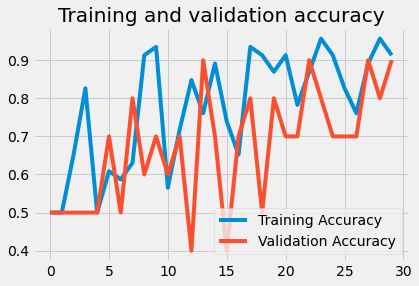

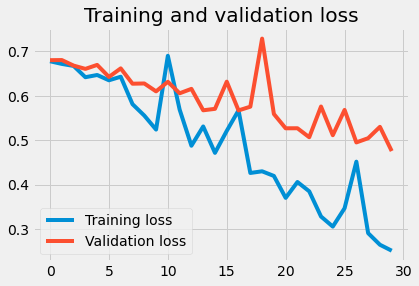

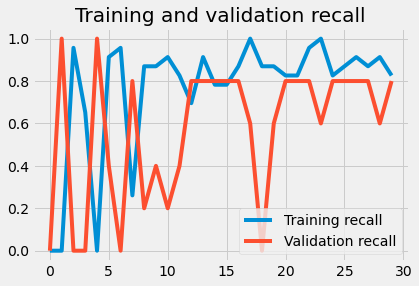

In [68]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
plot_performance(history)

In [ ]:
# saving model
os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

## Pretrained Network Model 1
---


## Data Augmentation
---
Run it if the data is generally overfitting.

## Pretrained Network Method 2
requires GPU

---
### 